In [61]:
import time
from numpy.random import seed
from numpy.random import randint
import matplotlib.pyplot as plt

In [80]:
def Apriori_Union(itemset, length):
    canditate = []
    canditate_index = 0
    for i in range (0,length):
        item = str(itemset[i])
        for j in range (i+1,length):
            item1 = str(itemset[j])
            if item[0:(len(item)-1)] == item1[0:(len(item1)-1)]:
                    uset = item[0:(len(item)-1)]+item1[len(item1)-1]+item[len(item)-1] 
                    uset = ''.join(sorted(uset))  #Sort itemset by dict order
                    canditate.append(uset)
    return canditate

In [64]:
def Apriori_prune(Ck,MinSupport):
    L = []
    for i in Ck:
        #print(i)
        if Ck[i] >= minsupport:
            L.append(i)
    return sorted(L)

In [65]:
def Apriori_count_subset(Canditate,Canditate_len):
    #""" Use bool to know is subset or not """
    Lk = dict()
    file = open('/content/chess.dat')
    for l in file:
        #print(l)
        l = str(l.split())
        count = 0
        for i in range (0,Canditate_len):
            key = str(Canditate[i])
            if key not in Lk:
                Lk[key] = 0
            flag = True
            for k in key:
                if k not in l:
                    flag = False
                    break
            if flag:
                Lk[key] += 1
    file.close()
    return Lk

In [66]:
def apriori(minsupport):
    C1={} 
    file = open('/content/chess.dat')


    #"""Count one canditate"""
    for line in file:
        for item in line.split():
            if item in C1:
                C1[item] +=1
            else:
                C1[item] = 1
    file.close()
    sorted(C1.keys())
    L = []
    sorted(C1)
    L1 = Apriori_prune(C1,minsupport)
    L = Apriori_Union(L1,len(L1))
    print(L)
    print ('====================================')
    print ('Frequent 1-itemset is',L1)
    print( '====================================')
    k=2
    while L != []:
        C = dict()
        C = Apriori_count_subset(L,len(L))
        print(L)
        print(C)
        fruquent_itemset = []
        fruquent_itemset = Apriori_prune(C,minsupport)

        print(fruquent_itemset)
        #print ('====================================')
        #print ('Frequent',k,'-itemset is',fruquent_itemset)
      # print ('====================================')
        L = Apriori_gen(fruquent_itemset,len(fruquent_itemset))
        k += 1

In [81]:
minsupport = 500
times = list()
elements = list()
while minsupport <=3000:
  start = time.clock()
  apriori(minsupport)
  elements.append(minsupport)    
  end = time.clock()
  times.append(end-start)
  # total time taken
  print(f"Runtime of the program is {end - start}")
  minsupport +=500

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


['12', '13', '15', '17', '19', '112', '113', '114', '115', '116', '117', '118', '119', '123', '124', '125', '126', '127', '128', '129', '134', '135', '136', '137', '138', '139', '145', '146', '147', '148', '149', '156', '157', '158', '159', '167', '168', '169', '178', '179', '189', '23', '25', '27', '29', '012', '022', '023', '024', '025', '027', '028', '029', '122', '123', '124', '125', '127', '128', '129', '223', '224', '225', '227', '228', '229', '234', '235', '237', '238', '239', '245', '247', '248', '249', '257', '258', '259', '278', '279', '289', '35', '37', '39', '134', '136', '138', '139', '346', '348', '349', '368', '369', '389', '024', '044', '045', '046', '047', '048', '244', '245', '246', '247', '248', '445', '446', '447', '448', '456', '457', '458', '467', '468', '478', '57', '59', '015', '025', '045', '055', '056', '058', '125', '145', '155', '156', '158', '245', '255', '256', '258', '455', '456', '458', '556', '558', '568', '026', '046', '056', '066', '068', '069', '246'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


['12', '13', '15', '17', '19', '112', '113', '114', '115', '116', '117', '119', '123', '124', '125', '126', '127', '129', '134', '135', '136', '137', '139', '145', '146', '147', '149', '156', '157', '159', '167', '169', '179', '23', '25', '27', '29', '012', '023', '024', '025', '027', '029', '123', '124', '125', '127', '129', '234', '235', '237', '239', '245', '247', '249', '257', '259', '279', '35', '37', '39', '134', '136', '138', '139', '346', '348', '349', '368', '369', '389', '024', '044', '046', '048', '244', '246', '248', '446', '448', '468', '57', '59', '015', '025', '045', '056', '058', '125', '145', '156', '158', '245', '256', '258', '456', '458', '568', '026', '046', '066', '068', '069', '246', '266', '268', '269', '466', '468', '469', '668', '669', '689', '79', '017', '027', '047', '127', '147', '247']
{'12': 3196, '13': 3196, '15': 3196, '17': 3196, '19': 3195, '112': 3196, '113': 3196, '114': 3196, '115': 3196, '116': 3196, '117': 3196, '119': 3195, '123': 6392, '124': 63

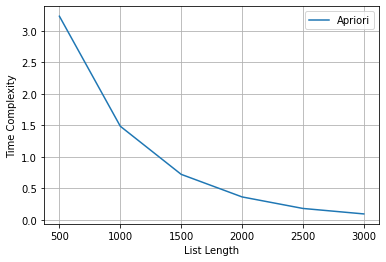

In [83]:
plt.xlabel('List Length')
plt.ylabel('Time Complexity')
plt.plot(elements, times, label ='Apriori')
plt.grid()
plt.legend()
plt.show()